# Построение классификационной модели, оценивающей вероятность дефолта клиента на стадии заведения кредитной заявки.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)

# для работы с датами, временем
from datetime import timedelta
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
accept = pd.read_csv("20_accept.csv")
reject = pd.read_csv("20_reject.csv")

In [3]:
accept.head()

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,140000.0,0.0,0,0.0,34.218548,38.497103,4.060109,NaN,NaN,10.056007,7
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17
3,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.0,1.174485,54.064219,1.458739,0.0,0.0,8.888876,21
4,0,OTHER,elementary,Corporate,183461.0,0.0,1,0.0,1.186985,44.063014,0.512194,1.0,1.0,2.649315,24


In [4]:
accept.shape

(32554, 15)

In [5]:
accept.columns

Index(['target', 'INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 'income',
       'DEPENDANT_NUMBER', 'IS_EMPL', 'COUNT_ACTIVE_CREDIT_NO_CC',
       'CNT_MNTH_FROM_LAST_PMNT', 'age', 'experience', 'inquiry_14_day',
       'inquiry_21_day', 'count_mnth_act_passport', 'UID'],
      dtype='object')

In [6]:
accept.dtypes

target                         int64
INCOME_TYPE                   object
EDUCATION_                    object
CUSTOMER_CATEGORY_            object
income                       float64
DEPENDANT_NUMBER             float64
IS_EMPL                        int64
COUNT_ACTIVE_CREDIT_NO_CC    float64
CNT_MNTH_FROM_LAST_PMNT      float64
age                          float64
experience                   float64
inquiry_14_day               float64
inquiry_21_day               float64
count_mnth_act_passport      float64
UID                            int64
dtype: object

## Посмотрим на данные

In [7]:
accept.describe(include = 'all')

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,32554.000000,32554,32554,13094,3.190100e+04,32511.000000,32554.000000,24217.000000,22460.000000,32554.000000,32502.000000,23400.000000,23400.000000,32554.000000,32554.000000
unique,NaN,2,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OTHER,elementary,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21885,21380,12689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.021411,NaN,NaN,NaN,6.154986e+04,0.007505,0.389752,0.670645,19.049060,36.480220,4.891766,0.360427,0.427094,7.225088,70383.331449
std,0.144751,NaN,NaN,NaN,1.036028e+05,0.108138,0.487702,0.835817,134.965621,8.228790,5.301986,0.610469,0.690228,3.348552,40590.154092
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,-66.559028,25.000741,-4.600000,0.000000,0.000000,-0.019126,7.000000
25%,0.000000,NaN,NaN,NaN,2.700000e+04,0.000000,0.000000,0.000000,0.529452,29.530362,1.227014,0.000000,0.000000,4.960678,35324.000000
50%,0.000000,NaN,NaN,NaN,4.157600e+04,0.000000,0.000000,0.000000,0.925482,34.761213,3.227397,0.000000,0.000000,7.743169,70243.000000
75%,0.000000,NaN,NaN,NaN,7.000000e+04,0.000000,1.000000,1.000000,3.501036,42.367123,6.475850,1.000000,1.000000,9.906849,105382.250000


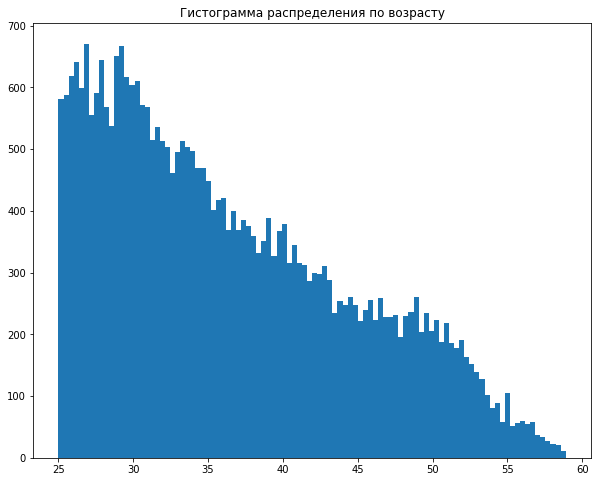

In [8]:
plt.hist(accept['age'],bins=100)
plt.title('Гистограмма распределения по возрасту')
plt.show()

In [9]:
reject.describe(include = 'all')

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
count,10693,10693,5651,10147.000000,10688.000000,10693.000000,6285.000000,5226.000000,10693.000000,10685.000000,6089.000000,6089.000000,10693.000000,10693.000000
unique,2,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,OTHER,elementary,Corporate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6684,6778,5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33651.242633,0.001778,0.543253,0.540971,42.478167,24.037108,1.660079,0.340614,0.414025,3.509274,72713.527728
std,NaN,NaN,NaN,21821.837966,0.046357,0.498149,0.730867,228.831924,0.738261,1.394135,0.619647,0.708179,1.154384,41248.658196
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-31.072849,0.002732,0.024590,0.000000,0.000000,0.002740,12.000000
25%,NaN,NaN,NaN,20787.500000,0.000000,0.000000,0.000000,0.506989,23.547945,0.602425,0.000000,0.000000,3.063852,36800.000000
50%,NaN,NaN,NaN,29115.000000,0.000000,1.000000,0.000000,0.864539,24.109290,1.225735,0.000000,0.000000,3.713115,74767.000000
75%,NaN,NaN,NaN,40318.000000,0.000000,1.000000,1.000000,1.849322,24.581967,2.249315,1.000000,1.000000,4.292350,108555.000000


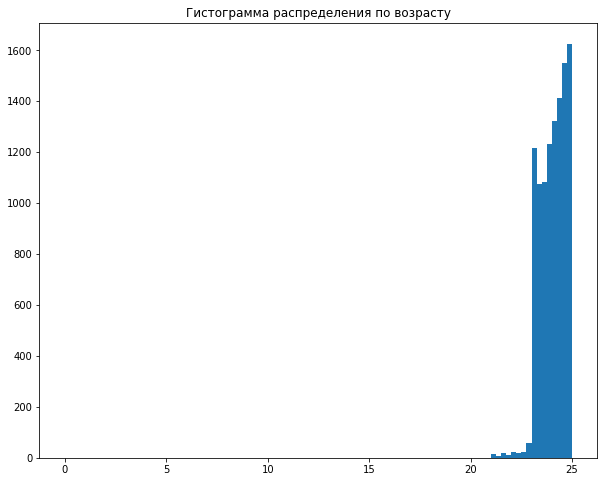

In [10]:
plt.hist(reject['age'],bins=100)
plt.title('Гистограмма распределения по возрасту')
plt.show()

In [11]:
accept.groupby('EDUCATION_').count()['UID']

EDUCATION_
advanced       8433
beginner       1534
elementary    21380
high           1207
Name: UID, dtype: int64

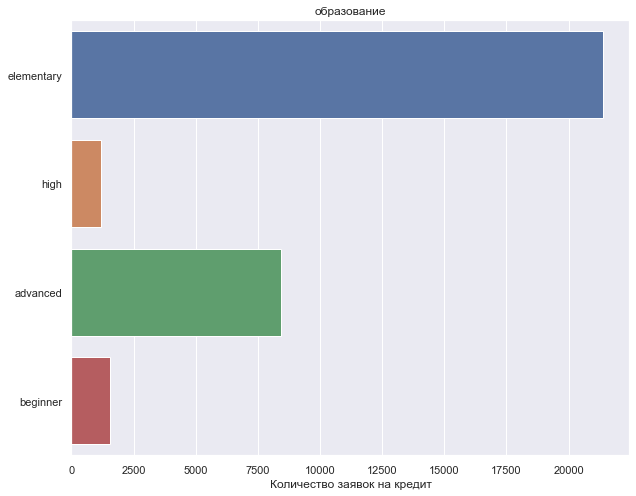

In [12]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='EDUCATION_', data=accept)
ax.set_title('образование')
ax.set_ylabel('')

ax.set(xlabel='Количество заявок на кредит')


plt.show()

In [13]:
accept.groupby(by='EDUCATION_').mean()

,target,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
EDUCATION_,,,,,,,,,,,,
advanced,0.027985,36105.252808,0.006304,0.401636,0.661202,19.633741,38.749606,5.686537,0.309895,0.367654,6.944812,73347.055022
beginner,0.017601,94863.121745,0.007848,0.393742,0.829088,14.275644,35.862688,4.433871,0.396450,0.464920,7.441486,65192.445241
elementary,0.018241,70278.956095,0.007956,0.383068,0.667108,19.496810,35.845611,4.675305,0.377556,0.448352,7.335764,69707.032507
high,0.036454,47491.987510,0.007457,0.420050,0.585870,13.739240,32.650465,3.765706,0.356180,0.408989,6.947819,68253.265120


# 1. Доля 1 в выборке accept

In [14]:
# количество значений 0 и 1 в выборке для целевой переменной
accept.target.value_counts()

0    31857
1      697
Name: target, dtype: int64

In [15]:
# доля от общего числа ответов; берем просто число строк в дф так как пропущенных в target нет

accept.target.value_counts()[1] / accept.shape[0]

0.021410579345088162

In [16]:
# в процентах:

print(accept.target.value_counts()[1] / accept.shape[0] * 100, '%')

2.141057934508816 %


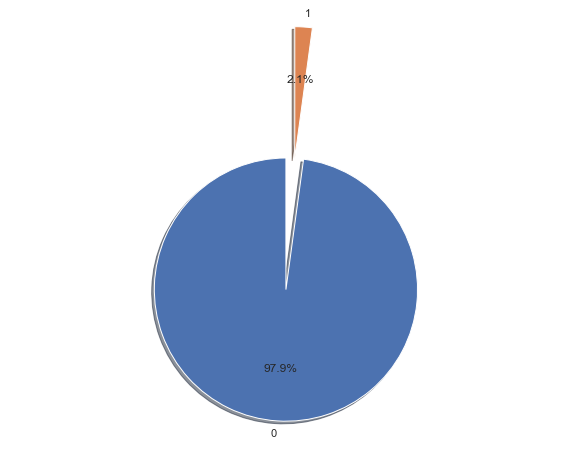

In [17]:
fig1, ax1 = plt.subplots()
ax1.pie(accept.target.value_counts(), explode=accept.target.value_counts().reset_index()['index'], 
        labels=accept.target.value_counts().reset_index()['index'],
        autopct='%1.1f%%',
        shadow=True, startangle=90
       )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Вывод: очень мало 1 (то есть мало плохих, дефолтных клиентов)

# 2. Расчет для интервальных данных

In [18]:
# интервальные переменные
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('UID')
interval_features.remove('IS_EMPL')

interval_features

['income',
 'DEPENDANT_NUMBER',
 'COUNT_ACTIVE_CREDIT_NO_CC',
 'CNT_MNTH_FROM_LAST_PMNT',
 'age',
 'experience',
 'inquiry_14_day',
 'inquiry_21_day',
 'count_mnth_act_passport']

In [19]:
# категориальные переменные
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['IS_EMPL']
categorical_features

['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 'IS_EMPL']

In [20]:
# число пропусков в % от общего числа
accept[interval_features].isnull().sum() / accept.shape[0]

income                       0.020059
DEPENDANT_NUMBER             0.001321
COUNT_ACTIVE_CREDIT_NO_CC    0.256098
CNT_MNTH_FROM_LAST_PMNT      0.310069
age                          0.000000
experience                   0.001597
inquiry_14_day               0.281194
inquiry_21_day               0.281194
count_mnth_act_passport      0.000000
dtype: float64

In [21]:
# медиана
accept[interval_features].median()

income                       41576.000000
DEPENDANT_NUMBER                 0.000000
COUNT_ACTIVE_CREDIT_NO_CC        0.000000
CNT_MNTH_FROM_LAST_PMNT          0.925482
age                             34.761213
experience                       3.227397
inquiry_14_day                   0.000000
inquiry_21_day                   0.000000
count_mnth_act_passport          7.743169
dtype: float64

In [22]:
# Среднее
accept[interval_features].mean()

income                       61549.858374
DEPENDANT_NUMBER                 0.007505
COUNT_ACTIVE_CREDIT_NO_CC        0.670645
CNT_MNTH_FROM_LAST_PMNT         19.049060
age                             36.480220
experience                       4.891766
inquiry_14_day                   0.360427
inquiry_21_day                   0.427094
count_mnth_act_passport          7.225088
dtype: float64

In [23]:
# Среднеквадратическое отклонение
accept[interval_features].std()

income                       103602.754773
DEPENDANT_NUMBER                  0.108138
COUNT_ACTIVE_CREDIT_NO_CC         0.835817
CNT_MNTH_FROM_LAST_PMNT         134.965621
age                               8.228790
experience                        5.301986
inquiry_14_day                    0.610469
inquiry_21_day                    0.690228
count_mnth_act_passport           3.348552
dtype: float64

### Обработка пропусков, выбросов в числовых данных

In [24]:
accept.isnull().sum()

target                           0
INCOME_TYPE                      0
EDUCATION_                       0
CUSTOMER_CATEGORY_           19460
income                         653
DEPENDANT_NUMBER                43
IS_EMPL                          0
COUNT_ACTIVE_CREDIT_NO_CC     8337
CNT_MNTH_FROM_LAST_PMNT      10094
age                              0
experience                      52
inquiry_14_day                9154
inquiry_21_day                9154
count_mnth_act_passport          0
UID                              0
dtype: int64

In [25]:
# заполняем пропуски в числовых данных средним, для категориальных - медианой

accept['income'] = accept['income'].fillna((accept['income'].mean()))
accept['CNT_MNTH_FROM_LAST_PMNT'] = accept['CNT_MNTH_FROM_LAST_PMNT'].fillna((accept['CNT_MNTH_FROM_LAST_PMNT'].mean()))
accept['experience'] = accept['experience'].fillna((accept['experience'].mean()))

#средним целым так как все значения целые
accept['DEPENDANT_NUMBER'] = accept['DEPENDANT_NUMBER'].fillna(round((accept['DEPENDANT_NUMBER'].mean())))
accept['COUNT_ACTIVE_CREDIT_NO_CC'] = accept['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(round((accept['COUNT_ACTIVE_CREDIT_NO_CC'].mean())))
accept['inquiry_14_day'] = accept['inquiry_14_day'].fillna(round((accept['inquiry_14_day'].mean())))
accept['inquiry_21_day'] = accept['inquiry_21_day'].fillna(round((accept['inquiry_21_day'].mean())))


In [26]:
accept.isnull().any().any()

True

теперь пропусков нет

In [27]:
#for col in interval_features:
#    print(col, set(np.abs(accept[col] - accept[col].mean()) <= 3 * accept[col].std()))
    
#для всех колонок кроме 2 есть выбросы

In [28]:
#accept = accept[(np.abs(accept['income'] - accept['income'].mean()) <= 3 * accept['income'].std())]
#accept = accept[(np.abs(accept['DEPENDANT_NUMBER'] - accept['DEPENDANT_NUMBER'].mean()) <= 3 * accept['DEPENDANT_NUMBER'].std())]
#accept = accept[(np.abs(accept['COUNT_ACTIVE_CREDIT_NO_CC'] - accept['COUNT_ACTIVE_CREDIT_NO_CC'].mean()) <= 3 * accept['COUNT_ACTIVE_CREDIT_NO_CC'].std())]
#accept = accept[(np.abs(accept['CNT_MNTH_FROM_LAST_PMNT'] - accept['CNT_MNTH_FROM_LAST_PMNT'].mean()) <= 3 * accept['CNT_MNTH_FROM_LAST_PMNT'].std())]
#accept = accept[(np.abs(accept['experience'] - accept['experience'].mean()) <= 3 * accept['experience'].std())]
#accept = accept[(np.abs(accept['inquiry_14_day'] - accept['inquiry_14_day'].mean()) <= 3 * accept['inquiry_14_day'].std())]
#accept = accept[(np.abs(accept['inquiry_21_day'] - accept['inquiry_21_day'].mean()) <= 3 * accept['inquiry_21_day'].std())]

In [29]:
accept.shape

(32554, 15)

# 3. Расчет для категориальных данных

In [30]:
# Мода
from statistics import mode
accept[categorical_features].mode()

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL
0,OTHER,elementary,Corporate,0


In [31]:
# Доля пропущенных значений
accept[categorical_features].isnull().sum() / accept.shape[0] * 100

INCOME_TYPE            0.0000
EDUCATION_             0.0000
CUSTOMER_CATEGORY_    59.7776
IS_EMPL                0.0000
dtype: float64

### Заполнение пропусков в категориальных, проверка на аномальные

In [32]:
# для категориальных вместо пропусков поставим моду
accept['CUSTOMER_CATEGORY_'] = accept['CUSTOMER_CATEGORY_'].fillna(accept['CUSTOMER_CATEGORY_'].value_counts().index[0])

In [33]:
# Есть ли выбросы, аномальные значения? 
# так как это категориальные признаки, то аномальные значения скорее просто будут выглядеть как некорректные

for cat in categorical_features:
    print(accept[cat].unique())

['OTHER' '2NDFL']
['elementary' 'high' 'advanced' 'beginner']
['Corporate' 'VIP']
[0 1]


аномальных значений нет

## Information Value для числовых и категориальных

In [34]:
# преобразование WOE
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [35]:
# делим интервальные переменные на бины
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 5, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

In [36]:
for feature in interval_features:
    df, iv = calculate_woe_iv(accept, feature + '_bin', 'target')
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.03633036293388396
feature DEPENDANT_NUMBER   IV=  0.0
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.019444058110963523
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.10489000313908213
feature age   IV=  0.015056281600128701
feature experience   IV=  0.07863397866732326
feature inquiry_14_day   IV=  0.06357810293593273
feature inquiry_21_day   IV=  0.07857537321796583
feature count_mnth_act_passport   IV=  0.06302502912934194


In [37]:
for feature in categorical_features:
    accept[feature] = accept[feature].fillna("0-0") 

In [38]:
# разделим на трейн и тест выборку 
from sklearn.model_selection import train_test_split
train, test = train_test_split(accept,
                                test_size=0.3,
                                random_state=17,
                                stratify=accept['target'])

In [39]:
# создаем cкоркарту
scorecard = pd.DataFrame()

In [40]:
for feature in interval_features:
    
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})

    
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
    
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.04700291785475242
feature DEPENDANT_NUMBER   IV=  0.0
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.025118292859554876
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.0964913682514979
feature age   IV=  0.017738268267581556
feature experience   IV=  0.05551398756591706
feature inquiry_14_day   IV=  0.058447886940405
feature inquiry_21_day   IV=  0.06461981971880537
feature count_mnth_act_passport   IV=  0.09647987976074508


In [41]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
   
    print('feature', feature, '  IV= ',iv)

feature INCOME_TYPE   IV=  0.01298126002101965
feature EDUCATION_   IV=  0.05226507953875631
feature CUSTOMER_CATEGORY_   IV=  0.00946144300468553
feature IS_EMPL   IV=  0.7783329013537514


In [42]:
train.select_dtypes(include=['float64']).corr()

,WoE_income,WoE_DEPENDANT_NUMBER,WoE_COUNT_ACTIVE_CREDIT_NO_CC,WoE_CNT_MNTH_FROM_LAST_PMNT,WoE_age,WoE_experience,WoE_inquiry_14_day,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_INCOME_TYPE,WoE_EDUCATION_,WoE_CUSTOMER_CATEGORY_,WoE_IS_EMPL
WoE_income,1.000000,NaN,0.057575,0.027926,-0.046533,0.020451,-0.007220,-0.004458,-0.017403,0.028888,-0.114998,0.067268,-0.048459
WoE_DEPENDANT_NUMBER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WoE_COUNT_ACTIVE_CREDIT_NO_CC,0.057575,NaN,1.000000,0.117211,-0.002864,-0.034486,0.037278,0.048225,-0.008032,-0.000101,-0.029872,-0.002949,-0.039434
WoE_CNT_MNTH_FROM_LAST_PMNT,0.027926,NaN,0.117211,1.000000,-0.003290,0.027645,-0.034276,-0.040607,0.031767,0.007653,-0.038017,-0.012243,-0.039661
WoE_age,-0.046533,NaN,-0.002864,-0.003290,1.000000,-0.151222,-0.001404,-0.007414,0.321179,-0.011256,0.095934,-0.005876,0.060576
WoE_experience,0.020451,NaN,-0.034486,0.027645,-0.151222,1.000000,0.005727,0.007665,0.016437,0.050942,-0.048823,0.017287,-0.091765
WoE_inquiry_14_day,-0.007220,NaN,0.037278,-0.034276,-0.001404,0.005727,1.000000,0.847357,0.011052,-0.068664,-0.015042,0.007034,0.077905
WoE_inquiry_21_day,-0.004458,NaN,0.048225,-0.040607,-0.007414,0.007665,0.847357,1.000000,0.006348,-0.065369,-0.021665,0.004937,0.078894
WoE_count_mnth_act_passport,-0.017403,NaN,-0.008032,0.031767,0.321179,0.016437,0.011052,0.006348,1.000000,-0.014729,0.048064,0.014642,0.008204
WoE_INCOME_TYPE,0.028888,NaN,-0.000101,0.007653,-0.011256,0.050942,-0.068664,-0.065369,-0.014729,1.000000,0.016013,-0.025135,-0.424060


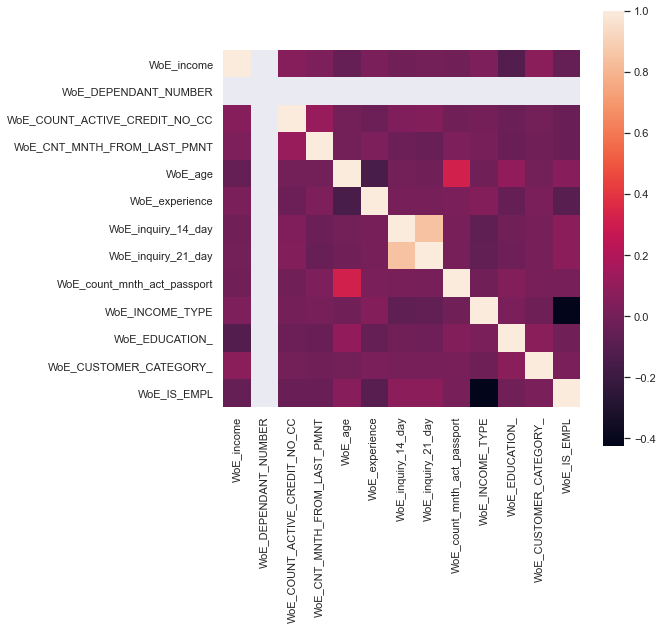

In [43]:
# матрица корреляций
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [44]:
# посмотрим на попарные корреляции между признаками
# по убыванию

df_corr = correlations_woe.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr = df_corr[df_corr < 1].drop_duplicates()
df_corr

WoE_inquiry_14_day             WoE_inquiry_21_day               0.847357
WoE_IS_EMPL                    WoE_INCOME_TYPE                  0.424060
WoE_count_mnth_act_passport    WoE_age                          0.321179
WoE_age                        WoE_experience                   0.151222
WoE_COUNT_ACTIVE_CREDIT_NO_CC  WoE_CNT_MNTH_FROM_LAST_PMNT      0.117211
                                                                  ...   
WoE_age                        WoE_CNT_MNTH_FROM_LAST_PMNT      0.003290
WoE_CUSTOMER_CATEGORY_         WoE_COUNT_ACTIVE_CREDIT_NO_CC    0.002949
WoE_age                        WoE_COUNT_ACTIVE_CREDIT_NO_CC    0.002864
WoE_inquiry_14_day             WoE_age                          0.001404
WoE_INCOME_TYPE                WoE_COUNT_ACTIVE_CREDIT_NO_CC    0.000101
Length: 66, dtype: float64

видно, что только признаки WoE_inquiry_14_day и WoE_inquiry_21_day имеют высокую корреляцию

In [45]:
features = test.columns.tolist()
features.remove('UID')
features.remove('target')

# исключаем, так как IV<0.02
features.remove('WoE_DEPENDANT_NUMBER')
features.remove('WoE_age')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_CUSTOMER_CATEGORY_')

# исключим WoE_inquiry_14_day, так как WoE_inquiry_14_day сильно коррелирует с WoE_inquiry_21_day, при этом IV у inquiry_14_day меньше
features.remove('WoE_inquiry_14_day')


features

['WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_EDUCATION_',
 'WoE_IS_EMPL']

In [46]:
train[features].head()

,WoE_income,WoE_COUNT_ACTIVE_CREDIT_NO_CC,WoE_CNT_MNTH_FROM_LAST_PMNT,WoE_experience,WoE_inquiry_21_day,WoE_count_mnth_act_passport,WoE_EDUCATION_,WoE_IS_EMPL
0,0.180953,0.058122,-0.187623,-0.045172,0.070683,0.348384,-0.287253,-0.4442
1,0.180953,0.058122,0.430813,-0.045172,0.070683,0.348384,-0.287253,-0.4442
2,0.180953,0.058122,-0.187623,-0.045172,0.070683,0.348384,-0.287253,-0.4442
3,0.180953,0.058122,-0.187623,-0.045172,0.070683,0.348384,-0.287253,-0.4442
4,-0.088174,0.058122,-0.187623,-0.045172,0.070683,0.348384,-0.287253,-0.4442


# 4. Логистическая регрессия на одобренных заявках

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [48]:
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-3.80948676]


,features,coef
0,WoE_income,-1.244687
1,WoE_COUNT_ACTIVE_CREDIT_NO_CC,-0.927978
2,WoE_CNT_MNTH_FROM_LAST_PMNT,-1.049295
3,WoE_experience,-1.267874
4,WoE_inquiry_21_day,-0.767960
5,WoE_count_mnth_act_passport,-0.946149
6,WoE_EDUCATION_,-1.257572
7,WoE_IS_EMPL,-1.042114


In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


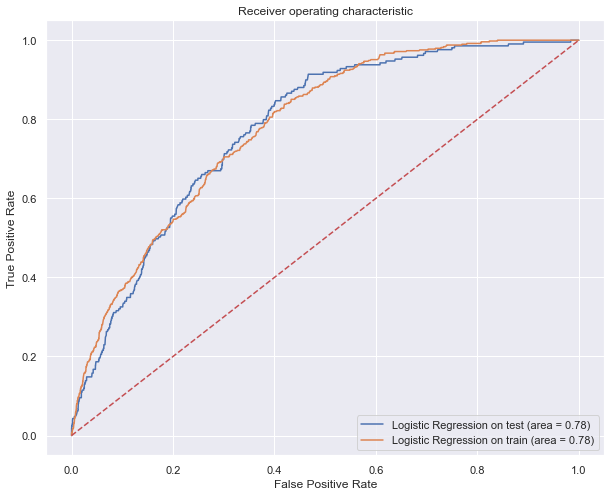

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [89]:
#gini
0.78-0.5

0.28

In [52]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.019879, G-Mean=1.191


In [53]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output


In [54]:
X_test['predictions_01'] = [el for el in predictions_01]

<Figure size 720x576 with 0 Axes>

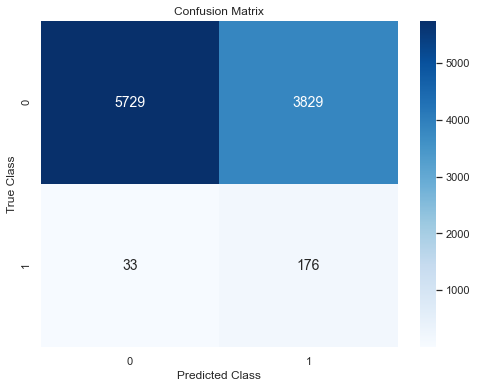

In [55]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
sns.set_style("whitegrid")

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, X_test['predictions_01'])
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, 
            xticklabels = labels, yticklabels = labels, annot = True, 
            fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [56]:
precision = 176/(176+3829)
recall = 176/(176+33)

f1 = 2 * precision * recall / (precision+recall)
print('precision=%f, recall=%.3f, f1=%.3f' % (precision, recall, f1))

precision=0.043945, recall=0.842, f1=0.084


очень низкий f1

In [57]:
# калибровка 
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')

In [58]:
pdo = 20 
Target_Odds = 50 
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [59]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,"(50011.0, 80000.0]",-0.33,-1.24,34.0
1,income,"(35185.0, 50011.0]",-0.09,-1.24,43.0
2,income,"(25000.0, 35185.0]",0.18,-1.24,52.0
3,income,"(-0.001, 25000.0]",0.18,-1.24,52.0
4,income,"(80000.0, 11450378.0]",0.19,-1.24,53.0
5,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",-0.43,-0.93,34.0
6,COUNT_ACTIVE_CREDIT_NO_CC,"(-0.001, 1.0]",0.06,-0.93,47.0
7,CNT_MNTH_FROM_LAST_PMNT,"(13.943, 19.049]",-0.19,-1.05,40.0
8,CNT_MNTH_FROM_LAST_PMNT,"(-66.56, 0.574]",-0.18,-1.05,41.0
9,CNT_MNTH_FROM_LAST_PMNT,"(0.574, 1.084]",-0.03,-1.05,45.0


# 5. Анализ Reject Inference

In [60]:
reject.head()

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12
1,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27
2,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33
3,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41
4,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55


In [61]:
reject.insert(0, 'target', 0, True)

In [62]:
reject

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,2NDFL,elementary,NaN,26106.0,0.0,0,0.0,1.666801,24.353193,3.284153,1.0,1.0,4.268261,12
1,0,2NDFL,elementary,NaN,30276.0,0.0,0,1.0,0.660461,23.534494,3.581069,0.0,0.0,1.411206,27
2,0,2NDFL,advanced,NaN,23147.0,0.0,0,0.0,4.342025,24.580021,0.645774,0.0,1.0,4.544405,33
3,0,2NDFL,advanced,NaN,33116.0,0.0,0,0.0,0.758714,23.284153,0.901130,0.0,0.0,3.183060,41
4,0,2NDFL,elementary,NaN,45972.0,0.0,0,NaN,NaN,24.528535,1.405247,NaN,NaN,3.581967,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,0,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284,1.188060,NaN,NaN,3.401639,140863
10689,0,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984,0.994303,0.0,0.0,2.739509,140864
10690,0,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,0.568531,1.0,1.0,4.377049,140869
10691,0,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579,0.742039,NaN,NaN,3.002313,140885


In [63]:
all_ = accept.append(reject)
all_

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,...,UID,income_bin,DEPENDANT_NUMBER_bin,COUNT_ACTIVE_CREDIT_NO_CC_bin,CNT_MNTH_FROM_LAST_PMNT_bin,age_bin,experience_bin,inquiry_14_day_bin,inquiry_21_day_bin,count_mnth_act_passport_bin
0,0,OTHER,elementary,Corporate,140000.0,0.0,0,0.0,34.218548,38.497103,...,7,"(80000.0, 11450378.0]","(-0.001, 4.0]","(-0.001, 1.0]","(19.049, 1365.277]","(37.504, 44.418]","(2.294, 4.407]","(-0.001, 1.0]","(-0.001, 1.0]","(8.8, 10.252]"
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,...,11,"(80000.0, 11450378.0]","(-0.001, 4.0]","(-0.001, 1.0]","(1.084, 13.943]","(25.0, 28.673]","(0.948, 2.294]","(-0.001, 1.0]","(-0.001, 1.0]","(6.6, 8.8]"
2,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,...,17,"(80000.0, 11450378.0]","(-0.001, 4.0]","(-0.001, 1.0]","(19.049, 1365.277]","(32.508, 37.504]","(-4.601, 0.948]","(-0.001, 1.0]","(-0.001, 1.0]","(6.6, 8.8]"
3,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.0,1.174485,54.064219,...,21,"(80000.0, 11450378.0]","(-0.001, 4.0]","(1.0, 8.0]","(1.084, 13.943]","(44.418, 58.899]","(0.948, 2.294]","(-0.001, 1.0]","(-0.001, 1.0]","(8.8, 10.252]"
4,0,OTHER,elementary,Corporate,183461.0,0.0,1,0.0,1.186985,44.063014,...,24,"(80000.0, 11450378.0]","(-0.001, 4.0]","(-0.001, 1.0]","(1.084, 13.943]","(37.504, 44.418]","(-4.601, 0.948]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.0201, 4.118]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,0,2NDFL,advanced,NaN,24311.0,0.0,0,NaN,NaN,23.456284,...,140863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10689,0,OTHER,elementary,NaN,21400.0,0.0,0,0.0,1.271550,24.040984,...,140864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10690,0,OTHER,elementary,Corporate,22532.0,0.0,1,1.0,0.601299,24.442623,...,140869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10691,0,OTHER,elementary,NaN,21750.0,0.0,0,NaN,NaN,23.218579,...,140885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Какая доля отказанных заявок от всей выборки заявок?

In [64]:
reject.shape[0] / (accept.shape[0]+reject.shape[0])

0.24725414479617083

In [65]:
all_.isnull().sum()

target                               0
INCOME_TYPE                          0
EDUCATION_                           0
CUSTOMER_CATEGORY_                5042
income                             546
DEPENDANT_NUMBER                     5
IS_EMPL                              0
COUNT_ACTIVE_CREDIT_NO_CC         4408
CNT_MNTH_FROM_LAST_PMNT           5467
age                                  0
experience                           8
inquiry_14_day                    4604
inquiry_21_day                    4604
count_mnth_act_passport              0
UID                                  0
income_bin                       10693
DEPENDANT_NUMBER_bin             10693
COUNT_ACTIVE_CREDIT_NO_CC_bin    10693
CNT_MNTH_FROM_LAST_PMNT_bin      10693
age_bin                          10693
experience_bin                   10693
inquiry_14_day_bin               10693
inquiry_21_day_bin               10693
count_mnth_act_passport_bin      10693
dtype: int64

In [66]:
# заполняем пропуски в числовых данных средним, для категориальных - медианой

all_['income'] = all_['income'].fillna((all_['income'].mean()))
all_['CNT_MNTH_FROM_LAST_PMNT'] = all_['CNT_MNTH_FROM_LAST_PMNT'].fillna((all_['CNT_MNTH_FROM_LAST_PMNT'].mean()))
all_['experience'] = all_['experience'].fillna((all_['experience'].mean()))

#средним целым так как все значения целые
all_['DEPENDANT_NUMBER'] = all_['DEPENDANT_NUMBER'].fillna(round((all_['DEPENDANT_NUMBER'].mean())))
all_['COUNT_ACTIVE_CREDIT_NO_CC'] = all_['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(round((all_['COUNT_ACTIVE_CREDIT_NO_CC'].mean())))
all_['inquiry_14_day'] = all_['inquiry_14_day'].fillna(round((all_['inquiry_14_day'].mean())))
all_['inquiry_21_day'] = all_['inquiry_21_day'].fillna(round((all_['inquiry_21_day'].mean())))

all_['CUSTOMER_CATEGORY_'] = all_['CUSTOMER_CATEGORY_'].fillna(accept['CUSTOMER_CATEGORY_'].value_counts().index[0])

In [67]:
all_.isnull().any().any()

True

# IV для всей выборки

In [68]:
# делим интервальные переменные на бины
for feature in interval_features:
    all_[feature + '_bin'] = pd.qcut(all_[feature], 5, duplicates='drop')
    all_[feature + '_bin'] = all_[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

In [69]:
for feature in interval_features:
    df, iv = calculate_woe_iv(all_, feature + '_bin', 'target')
    print('feature', feature, '  IV= ',iv)
    

feature income   IV=  0.0800511535826795
feature DEPENDANT_NUMBER   IV=  0.0
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.03306716789379156
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.37974080983644715
feature age   IV=  0.06458481617675936
feature experience   IV=  0.05120826062446697
feature inquiry_14_day   IV=  0.06582048863196695
feature inquiry_21_day   IV=  0.08254318519207941
feature count_mnth_act_passport   IV=  0.0991982462899949


In [70]:
for feature in categorical_features:
    all_[feature] = all_[feature].fillna("0-0") 

In [71]:
# разделим на трейн и тест выборку 
from sklearn.model_selection import train_test_split
train, test = train_test_split(all_,
                                test_size=0.3,
                                random_state=17,
                                stratify=all_['target'])

In [72]:
# создаем cкоркарту
scorecard = pd.DataFrame()

In [73]:
for feature in interval_features:
    
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})

    
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
#     scorecard = scorecard.append(df[['feature', 'Value', 'WoE']])
    
    
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.06815522800801348
feature DEPENDANT_NUMBER   IV=  0.0
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.03177174840385609
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.34988005526440197
feature age   IV=  0.07755185931611716
feature experience   IV=  0.03804827234044307
feature inquiry_14_day   IV=  0.10433945248347677
feature inquiry_21_day   IV=  0.1330664955796655
feature count_mnth_act_passport   IV=  0.09449882864347901


In [74]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    
   
    print('feature', feature, '  IV= ',iv)

feature INCOME_TYPE   IV=  0.00669018336189624
feature EDUCATION_   IV=  0.04354338111189453
feature CUSTOMER_CATEGORY_   IV=  0.005009145434060553
feature IS_EMPL   IV=  0.9485378271693103


In [75]:
# посмотрим на попарные корреляции между признаками
# по убыванию
correlations_woe = train.select_dtypes(include=['float64']).corr()


df_corr = correlations_woe.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr = df_corr[df_corr < 1].drop_duplicates()
df_corr

WoE_inquiry_14_day           WoE_inquiry_21_day             0.841475
WoE_INCOME_TYPE              WoE_IS_EMPL                    0.452360
WoE_EDUCATION_               WoE_income                     0.260600
WoE_CNT_MNTH_FROM_LAST_PMNT  WoE_age                        0.252573
WoE_count_mnth_act_passport  WoE_CNT_MNTH_FROM_LAST_PMNT    0.219795
                                                              ...   
WoE_inquiry_14_day           WoE_CUSTOMER_CATEGORY_         0.004101
WoE_age                      WoE_inquiry_14_day             0.004080
WoE_CUSTOMER_CATEGORY_       WoE_IS_EMPL                    0.003807
WoE_inquiry_21_day           WoE_CUSTOMER_CATEGORY_         0.002822
WoE_experience               WoE_INCOME_TYPE                0.001340
Length: 66, dtype: float64

In [76]:
features = test.columns.tolist()
features.remove('UID')
features.remove('target')

# исключаем, так как IV<0.02
features.remove('WoE_DEPENDANT_NUMBER')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_CUSTOMER_CATEGORY_')

# исключим WoE_inquiry_14_day, так как WoE_inquiry_14_day сильно коррелирует с WoE_inquiry_21_day, при этом IV у inquiry_14_day меньше
features.remove('WoE_inquiry_14_day')

features

['WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_age',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_EDUCATION_',
 'WoE_IS_EMPL']

# Логистическая регрессия на всей выборке

In [77]:
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [78]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-4.29832081]


,features,coef
0,WoE_income,-0.937264
1,WoE_COUNT_ACTIVE_CREDIT_NO_CC,-0.516065
2,WoE_CNT_MNTH_FROM_LAST_PMNT,-0.785759
3,WoE_age,-0.889828
4,WoE_experience,-1.050454
5,WoE_inquiry_21_day,-0.748509
6,WoE_count_mnth_act_passport,-0.608009
7,WoE_EDUCATION_,-1.398084
8,WoE_IS_EMPL,-0.960372


In [79]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


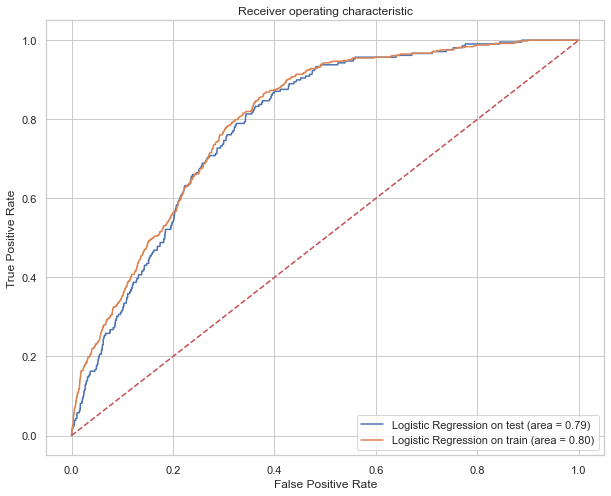

In [80]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))



Best Threshold=0.017186, G-Mean=1.219


In [88]:
#gini
0.79-0.5

0.29000000000000004

In [82]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output

X_test['predictions_01'] = [el for el in predictions_01]

<Figure size 720x576 with 0 Axes>

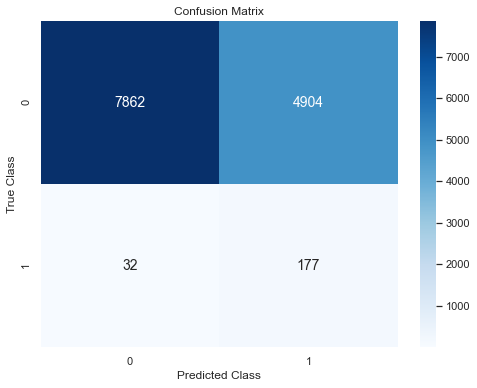

In [83]:
sns.set_style("whitegrid")

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, X_test['predictions_01'])
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, 
            xticklabels = labels, yticklabels = labels, annot = True, 
            fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [84]:
precision = 170/(170+4655)
recall = 170/(170+39)

f1 = 2 * precision * recall / (precision+recall)
print('precision=%f, recall=%.3f, f1=%.3f' % (precision, recall, f1))

precision=0.035233, recall=0.813, f1=0.068


f1 стал еще меньше

Однако, по логике, вторая модель должна была получиться лучше, поскольку она учитывает данные не только по одобренным, но и по отказанным заявкам.

In [85]:
# калибровка 
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')

In [86]:
pdo = 20 
Target_Odds = 50 
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [87]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,"(69599.8, 11450378.0]",-0.22,-0.94,41.0
1,income,"(45425.6, 69599.8]",-0.22,-0.94,41.0
2,income,"(32496.8, 45425.6]",-0.04,-0.94,46.0
3,income,"(23000.0, 32496.8]",0.12,-0.94,50.0
4,income,"(-0.001, 23000.0]",0.52,-0.94,61.0
5,COUNT_ACTIVE_CREDIT_NO_CC,"(1.0, 8.0]",-0.51,-0.52,39.0
6,COUNT_ACTIVE_CREDIT_NO_CC,"(-0.001, 1.0]",0.06,-0.52,48.0
7,CNT_MNTH_FROM_LAST_PMNT,"(-66.56, 0.606]",-0.31,-0.79,40.0
8,CNT_MNTH_FROM_LAST_PMNT,"(1.18, 19.049]",-0.15,-0.79,44.0
9,CNT_MNTH_FROM_LAST_PMNT,"(0.606, 1.18]",-0.11,-0.79,44.0
